In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import widgets


In [71]:
data = pd.read_csv(r"C:\Users\ellet\Documents\Documents\Arts et Métiers\Python Labs\Project 1\Project 1\cybersecurity_attacks_cleaned.csv")

In [77]:
data

,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment,Geo-location Data,Proxy Information,IDS/IPS Alerts,Log Source
0,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Segment A,"Jamshedpur, Sikkim",150.9.97.135,NaN,Server
1,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Segment B,"Bilaspur, Nagaland",NaN,NaN,Firewall
2,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C,"Bokaro, Rajasthan",114.133.48.179,Alert Data,Firewall
3,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B,"Jaunpur, Rajasthan",NaN,Alert Data,Firewall
4,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C,"Anantapur, Tripura",149.6.110.119,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Logged,Medium,Segment A,"Nashik, Manipur",NaN,Alert Data,Firewall
39996,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,IoC Detected,27.25,NaN,DDoS,Known Pattern A,Logged,High,Segment C,"Vadodara, Mizoram",60.51.30.46,NaN,Firewall
39997,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Blocked,Low,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Alert Data,Server
39998,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,NaN,Server


In [45]:
data.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [107]:

# Define the columns to convert to binary
# non_numeric_columns = data.select_dtypes(exclude=['number']).columns
columns_to_convert = ["Log Source", "Network Segment", "Protocol", "Traffic Type", "Action Taken"]

# Convert each column to binary using one-hot encoding
data_binary = pd.get_dummies(data, columns=columns_to_convert, drop_first=True)

# Save the binary-converted dataset (optional)
data_binary.to_csv(r"C:\Users\ellet\Documents\Documents\Arts et Métiers\Python Labs\Project 1\Project 1\cybersecurity_attacks_binary.csv", index=False)

# Display the first few rows of the updated DataFrame
print(data_binary.head())

  Source IP Address Destination IP Address  Source Port  Destination Port  \
0     103.216.15.12           84.9.164.252        31225             17616   
1    78.199.217.198         66.191.137.154        17245             48166   
2      63.79.210.48          198.219.82.17        16811             53600   
3     163.42.196.10        101.228.192.255        20018             32534   
4     71.166.185.76        189.243.174.238         6131             26646   

   Packet Length Packet Type Malware Indicators  Anomaly Scores  \
0            503        Data       IoC Detected           28.67   
1           1174        Data       IoC Detected           51.50   
2            306     Control       IoC Detected           87.42   
3            385        Data                NaN           15.79   
4           1462        Data                NaN            0.52   

   Alerts/Warnings Attack Type  ... IDS/IPS Alerts Log Source_Server  \
0              NaN     Malware  ...            NaN            

In [109]:
print(data.columns)

Index(['Source IP Address', 'Destination IP Address', 'Source Port',
       'Destination Port', 'Protocol', 'Packet Length', 'Packet Type',
       'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [131]:
print(data.dtypes)  # Check data types of all columns


Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
Network Segment            object
Geo-location Data          object
Proxy Information          object
IDS/IPS Alerts             object
Log Source                 object
dtype: object


In [137]:
print(data.columns)


Index(['Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores',
       'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken',
       'Severity Level', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


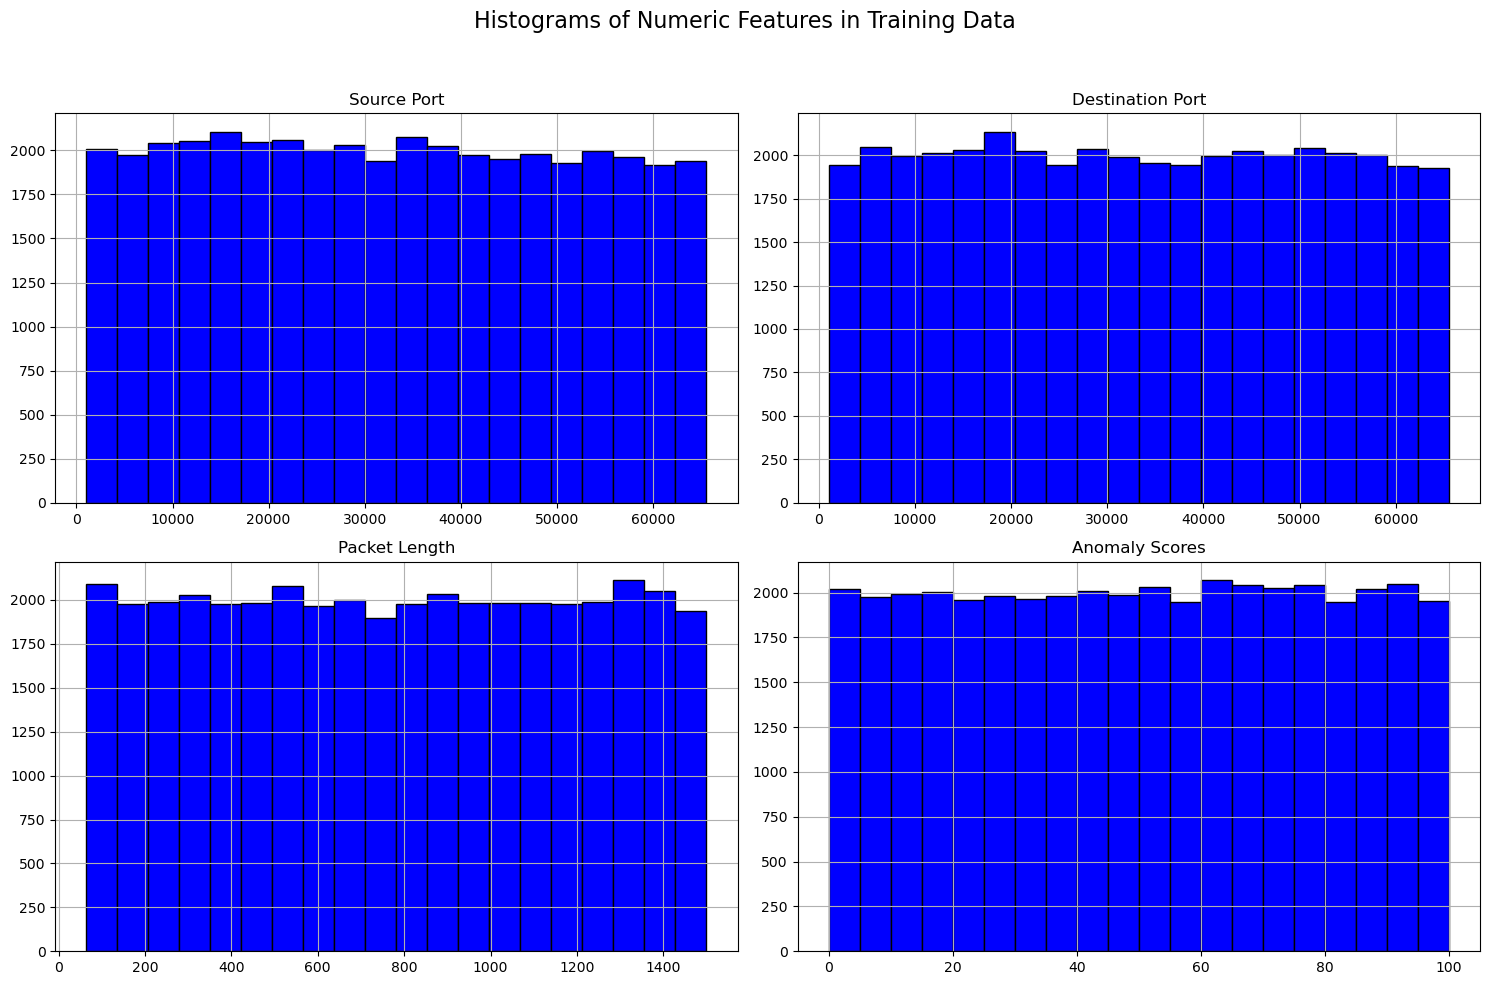

In [89]:
import pandas as pd

# Load your dataset
data = pd.read_csv("your_dataset.csv")  # Replace with your file path

# Continue with the histogram plotting code
numeric_columns = data.select_dtypes(include=['number']).columns

# Creating histograms for numeric columns in the training data
data[numeric_columns].hist(figsize=(15, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features in Training Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()


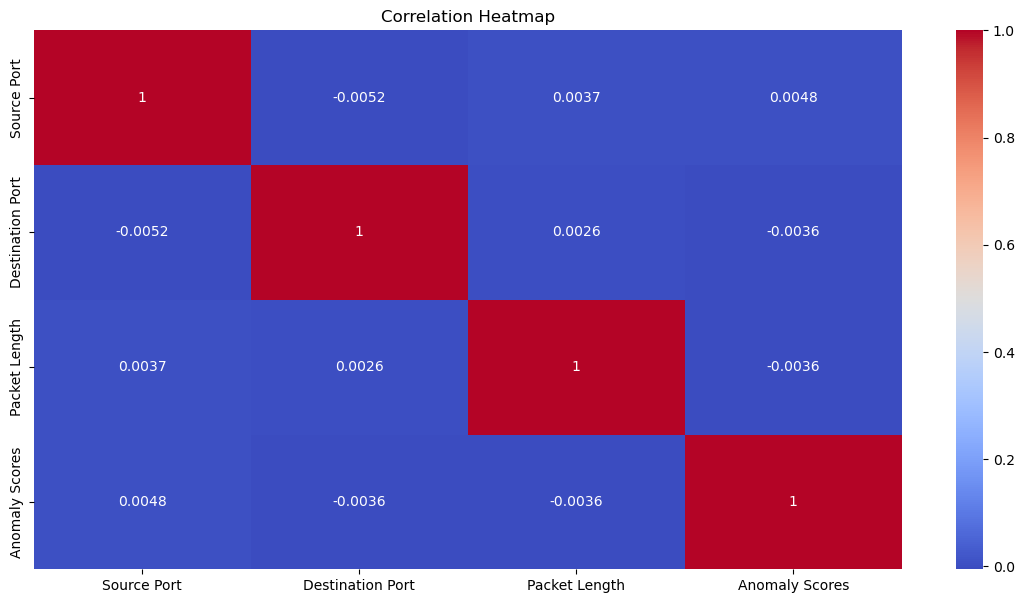

In [121]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation
correlation = numeric_data.corr()

# Plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
